<a href="https://colab.research.google.com/github/amolpatel18/fintechapp/blob/main/Uber_CaseStudy_4_12Jan26_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd


In [102]:
!gdown 13KW_CuVVqU3e2coQkUwhD_F-w4A_gcoo

Downloading...
From: https://drive.google.com/uc?id=13KW_CuVVqU3e2coQkUwhD_F-w4A_gcoo
To: /content/ncr_ride_bookings.csv
100% 25.5M/25.5M [00:00<00:00, 264MB/s]


In [103]:
df = pd.read_csv("/content/ncr_ride_bookings.csv")

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [105]:
def extract_time_info(df):
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
  df['DoM'] = df['DateTime'].dt.day
  df['month'] = df['DateTime'].dt.month
  df['HoD'] = df['DateTime'].dt.hour
  df['DoW'] = df['DateTime'].dt.weekday
  # is_weekend column: 1 if Saturday(5) or Sunday(6), else 0
  df['is_weekend'] = df['DoW'].apply(lambda x: 1 if x >= 5 else 0)
  #office pickup hour, day-is-weekday and time b/w (8am to 11am) (4 pm to 8 pm)
  df['OfficePickhour'] = df.apply(
      lambda row: 1 if (row['is_weekend'] == 0 and ((8 <= row['HoD'] <= 11) or (16 <= row['HoD'] <= 20))) else 0,
      axis=1)
  return df




In [106]:
df['Pickup Location'].nunique()

176

In [107]:
df['Drop Location'].nunique()

176

In [108]:
df.groupby('Pickup Location').size().sort_values(ascending=False)

,0
Pickup Location,
Khandsa,949
Barakhamba Road,946
Saket,931
Badarpur,921
Pragati Maidan,920
...,...
Mandi House,800
Noida Sector 18,799
Laxmi Nagar,797


In [109]:
df.groupby('Drop Location').size().sort_values(ascending=False)

,0
Drop Location,
Ashram,936
Basai Dhankot,917
Lok Kalyan Marg,916
Narsinghpur,913
Cyber Hub,912
...,...
MG Road,799
Bhiwadi,792
Shivaji Park,786


### Conclusion
All the Pickup and Drop Locations have more of less same demand in range of (770 to 936)

In [110]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
def encode_geo(df):
  df.rename(columns={'Pickup Location': 'PickL', 'Drop Location':'DropL'}, inplace=True)

  # Combine unique locations from both columns
  all_locations = pd.concat([df['PickL'], df['DropL']]).unique()

  # Fit LabelEncoder on all unique locations
  encoder = LabelEncoder()
  encoder.fit(all_locations)

  # Encode both columns
  df['PickL'] = encoder.transform(df['PickL'])
  df['DropL'] = encoder.transform(df['DropL'])
  print(all_locations)
  return df, all_locations




In [111]:
def decode_geo(endcoded_loc, geo_loc_list):
    # Fit LabelEncoder on all unique locations
  encoder = LabelEncoder()
  encoder.fit(geo_loc_list)
  # Decode it back to original string
  decoded_location = encoder.inverse_transform([endcoded_loc])[0]
  return decoded_location



In [112]:
df, all_locations = encode_geo(df)
df.info()

['Palam Vihar' 'Shastri Nagar' 'Khandsa' 'Central Secretariat'
 'Ghitorni Village' 'AIIMS' 'Vaishali' 'Mayur Vihar' 'Noida Sector 62'
 'Rohini' 'Udyog Bhawan' 'Vidhan Sabha' 'Patel Chowk' 'Malviya Nagar'
 'Madipur' 'Jama Masjid' 'IGI Airport' 'Vinobapuri' 'Kashmere Gate'
 'Pitampura' 'Punjabi Bagh' 'Greater Noida' 'Tis Hazari' 'Noida Sector 18'
 'Kanhaiya Nagar' 'Okhla' 'Cyber Hub' 'Sadar Bazar Gurgaon' 'Shastri Park'
 'Faridabad Sector 15' 'Qutub Minar' 'Mundka' 'DLF City Court'
 'New Colony' 'Nirman Vihar' 'New Delhi Railway Station'
 'Civil Lines Gurgaon' 'Seelampur' 'Noida Extension' 'Adarsh Nagar'
 'Panipat' 'Karol Bagh' 'Sultanpur' 'Moti Nagar' 'Dilshad Garden'
 'Aya Nagar' 'Rajiv Chowk' 'MG Road' 'Jasola' 'Ardee City' 'Meerut'
 'Anand Vihar ISBT' 'Lajpat Nagar' 'Tughlakabad' 'Karkarduma' 'Dwarka Mor'
 'Anand Vihar' 'Uttam Nagar' 'Model Town' 'Mandi House' 'Ghitorni'
 'Rajiv Nagar' 'Sohna Road' 'Bahadurgarh' 'Moolchand' 'INA Market'
 'Sushant Lok' 'IIT Delhi' 'Satguru Ram Singh M

In [113]:
for i in range(0,175):
  ret = decode_geo(i,all_locations)
  print(ret)

AIIMS
Adarsh Nagar
Akshardham
Ambience Mall
Anand Vihar
Anand Vihar ISBT
Ardee City
Arjangarh
Ashok Park Main
Ashok Vihar
Ashram
Aya Nagar
Azadpur
Badarpur
Badshahpur
Bahadurgarh
Barakhamba Road
Basai Dhankot
Bhikaji Cama Place
Bhiwadi
Botanical Garden
Central Secretariat
Chanakyapuri
Chandni Chowk
Chhatarpur
Chirag Delhi
Civil Lines Gurgaon
Connaught Place
Cyber Hub
DLF City Court
DLF Phase 3
Delhi Gate
Dilshad Garden
Dwarka Mor
Dwarka Sector 21
Faridabad Sector 15
GTB Nagar
Ghaziabad
Ghitorni
Ghitorni Village
Golf Course Road
Govindpuri
Greater Kailash
Greater Noida
Green Park
Gurgaon Railway Station
Gurgaon Sector 29
Gurgaon Sector 56
Gwal Pahari
Hauz Khas
Hauz Rani
Hero Honda Chowk
Huda City Centre
IFFCO Chowk
IGI Airport
IGNOU Road
IIT Delhi
IMT Manesar
INA Market
ITO
Inderlok
India Gate
Indirapuram
Indraprastha
Jahangirpuri
Jama Masjid
Janakpuri
Jasola
Jhilmil
Jor Bagh
Kadarpur
Kalkaji
Kanhaiya Nagar
Karkarduma
Karol Bagh
Kashmere Gate
Kashmere Gate ISBT
Kaushambi
Keshav Puram
Kh

In [114]:
all_locations

array(['Palam Vihar', 'Shastri Nagar', 'Khandsa', 'Central Secretariat',
       'Ghitorni Village', 'AIIMS', 'Vaishali', 'Mayur Vihar',
       'Noida Sector 62', 'Rohini', 'Udyog Bhawan', 'Vidhan Sabha',
       'Patel Chowk', 'Malviya Nagar', 'Madipur', 'Jama Masjid',
       'IGI Airport', 'Vinobapuri', 'Kashmere Gate', 'Pitampura',
       'Punjabi Bagh', 'Greater Noida', 'Tis Hazari', 'Noida Sector 18',
       'Kanhaiya Nagar', 'Okhla', 'Cyber Hub', 'Sadar Bazar Gurgaon',
       'Shastri Park', 'Faridabad Sector 15', 'Qutub Minar', 'Mundka',
       'DLF City Court', 'New Colony', 'Nirman Vihar',
       'New Delhi Railway Station', 'Civil Lines Gurgaon', 'Seelampur',
       'Noida Extension', 'Adarsh Nagar', 'Panipat', 'Karol Bagh',
       'Sultanpur', 'Moti Nagar', 'Dilshad Garden', 'Aya Nagar',
       'Rajiv Chowk', 'MG Road', 'Jasola', 'Ardee City', 'Meerut',
       'Anand Vihar ISBT', 'Lajpat Nagar', 'Tughlakabad', 'Karkarduma',
       'Dwarka Mor', 'Anand Vihar', 'Uttam Nagar', 'M

In [115]:
df['PickL'].unique()

array([116, 149,  80,  21,  39,   0, 168,  94, 112, 136, 164, 171, 121,
        90,  88,  65,  54, 172,  75, 123, 127,  43, 162, 111,  72, 113,
        28, 139, 150,  35, 128, 100,  29, 106, 108, 107,  26, 147, 109,
         1, 118,  74, 158,  99,  32,  11, 131,  87,  67,   6,  95,   5,
        83, 163,  73,  33,   4, 167,  97,  91,  38, 132, 153,  15,  98,
        58, 159,  56, 146, 101,  55,   2,  24,  57,  12,  68, 152, 138,
        76,  81,  53,  50, 144, 173,  89, 175,  79, 124,  93, 135, 140,
       103, 148, 161,  30,  85,  52,  96,  20, 134,  34, 110,  61,  16,
        47,  10,  46,  69, 141,  17, 166, 130,  86,  42, 145,  36, 170,
        40,  37, 102, 117,  13, 120,  48, 160, 143,  51,  31,  22, 129,
       151,  78, 142,  59,  63,  66,   8,  27,  64,  41, 174, 125,  62,
        71, 154, 105, 155,  70,   7,  25,  92,  44,  14,   9, 104,  23,
        45,  60, 133,  19, 156, 137, 122, 169, 126,  77,  18,  82, 115,
       157, 114, 165,  49, 119,   3,  84])

In [116]:
df['DropL'].unique()

array([ 68,  47,  90,  60,  79, 102, 127,  28, 111,   1,  34,   0,  81,
        39,  36,  88,   4, 132,  93,  20,  57, 114,  16, 141,  96, 173,
       125, 104, 148, 110,  91,  66, 166,  26,  73, 160, 109,   5,  21,
        50, 116, 129,  17,  13, 134,   2, 175,  54, 106,  44,  59, 107,
       100,  61, 123, 105,  63, 136,  25, 120,  74, 168,  53, 112,  48,
       140,  67, 162, 164, 142,  94,  46,  10,  29,  14,  30,  43,  55,
        15,  23, 150, 103,  32,  77, 128, 172,  87,  22, 171, 161,  85,
       117, 108,  65,  11,  49,  95,  64,  19,  12, 153, 151,  42,  92,
       113, 124, 130,  83,  78, 146,  35,  75, 143,  69, 115,  31, 169,
        40, 157, 139, 159,  18,   7,  51,  38,  89, 126, 144, 138,  99,
       165, 155,  98, 167, 122,   3, 101,  37, 152,  71, 118,  86,  82,
         8, 163, 149, 137, 119,  62,  58,  76, 158, 133, 170,   6,  45,
         9,  27,  24, 131, 156,  52, 135,  41,  56,  33, 121, 174, 147,
        97,  70, 145,  72,  80,  84, 154])

In [117]:
extract_time_info(df)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,PickL,DropL,Avg VTAT,Avg CTAT,...,Driver Ratings,Customer Rating,Payment Method,DateTime,DoM,month,HoD,DoW,is_weekend,OfficePickhour
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,116,68,NaN,NaN,...,NaN,NaN,NaN,2024-03-23 12:29:38,23,3,12,5,1,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,149,47,4.9,14.0,...,NaN,NaN,UPI,2024-11-29 18:01:39,29,11,18,4,0,1
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,80,90,13.4,25.8,...,4.9,4.9,Debit Card,2024-08-23 08:56:10,23,8,8,4,0,1
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,21,60,13.1,28.5,...,4.6,5.0,UPI,2024-10-21 17:17:25,21,10,17,0,0,1
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,39,79,5.3,19.6,...,4.1,4.3,UPI,2024-09-16 22:08:00,16,9,22,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,87,38,10.2,44.4,...,3.7,4.1,Uber Wallet,2024-11-11 19:34:01,11,11,19,0,0,1
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,40,2,5.1,30.8,...,4.8,5.0,UPI,2024-11-24 15:55:09,24,11,15,6,1,0
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,146,69,2.7,23.4,...,3.9,4.4,Cash,2024-09-18 10:55:15,18,9,10,2,0,1
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,37,140,6.9,39.6,...,4.1,3.7,UPI,2024-10-05 07:53:34,5,10,7,5,1,0


In [118]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,PickL,DropL,Avg VTAT,Avg CTAT,...,Driver Ratings,Customer Rating,Payment Method,DateTime,DoM,month,HoD,DoW,is_weekend,OfficePickhour
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,116,68,NaN,NaN,...,NaN,NaN,NaN,2024-03-23 12:29:38,23,3,12,5,1,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,149,47,4.9,14.0,...,NaN,NaN,UPI,2024-11-29 18:01:39,29,11,18,4,0,1
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,80,90,13.4,25.8,...,4.9,4.9,Debit Card,2024-08-23 08:56:10,23,8,8,4,0,1
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,21,60,13.1,28.5,...,4.6,5.0,UPI,2024-10-21 17:17:25,21,10,17,0,0,1
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,39,79,5.3,19.6,...,4.1,4.3,UPI,2024-09-16 22:08:00,16,9,22,0,0,0


In [119]:
df['DateTime']

,DateTime
0,2024-03-23 12:29:38
1,2024-11-29 18:01:39
2,2024-08-23 08:56:10
3,2024-10-21 17:17:25
4,2024-09-16 22:08:00
...,...
149995,2024-11-11 19:34:01
149996,2024-11-24 15:55:09
149997,2024-09-18 10:55:15
149998,2024-10-05 07:53:34


In [120]:
df['Booking Status'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [121]:
df['Incomplete Rides Reason'].unique()

array([nan, 'Vehicle Breakdown', 'Other Issue', 'Customer Demand'],
      dtype=object)

In [122]:
df['Incomplete Rides Reason']

,Incomplete Rides Reason
0,NaN
1,Vehicle Breakdown
2,NaN
3,NaN
4,NaN
...,...
149995,NaN
149996,NaN
149997,NaN
149998,NaN


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  object        
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   PickL                              150000 non-null  int64         
 7   DropL                              150000 non-null  int64         
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

In [124]:
  df.rename(columns={
                   'Booking Status':'BookStatus',
                   'Booking ID':'BookID',
                   'Customer ID':'CustID',
                   'Vehicle Type':'VehType',
                   'Avg VTAT':'VTAT',
                   'Avg CTAT':'CTAT',
                   'Cancelled Rides by Customer':'CANC',
                   'Reason for cancelling by Customer':'CANCRsn',
                   'Cancelled Rides by Driver':'CAND',
                   'Driver Cancellation Reason':'CANDRsn',
                   'Incomplete Rides':'Incomp',
                   'Incomplete Rides Reason':'IncompRsn',
                   'Customer Rating':'CustRat'
                   },inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            150000 non-null  object        
 1   Time            150000 non-null  object        
 2   BookID          150000 non-null  object        
 3   BookStatus      150000 non-null  object        
 4   CustID          150000 non-null  object        
 5   VehType         150000 non-null  object        
 6   PickL           150000 non-null  int64         
 7   DropL           150000 non-null  int64         
 8   VTAT            139500 non-null  float64       
 9   CTAT            102000 non-null  float64       
 10  CANC            10500 non-null   float64       
 11  CANCRsn         10500 non-null   object        
 12  CAND            27000 non-null   float64       
 13  CANDRsn         27000 non-null   object        
 14  Incomp          9000 non-null    flo

/tmp/ipython-input-2529502248.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


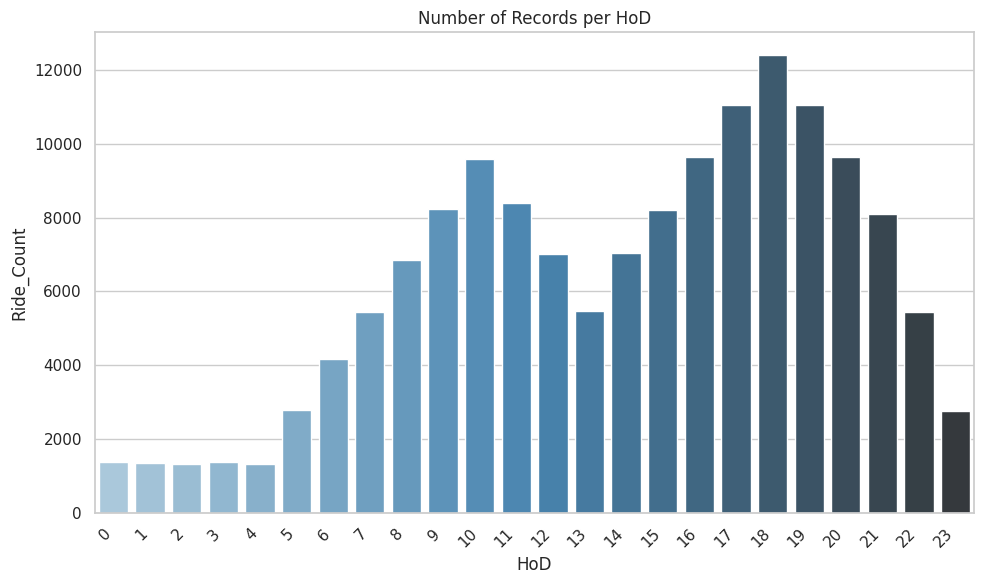

In [126]:

hod_ride_counts = (
    df.groupby('HoD')
      .size()
      .reset_index(name='Ride_Count')         # make it a DataFrame with column 'Count'
      .sort_values('Ride_Count', ascending=False)
)

import seaborn as sns
import matplotlib.pyplot as plt

# Set a style (optional)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # adjust size as needed

sns.barplot(
    data=hod_ride_counts,
    x='HoD',
    y='Ride_Count',
    palette='Blues_d'        # choose any palette you like
)

plt.title('Number of Records per HoD')
plt.xlabel('HoD')
plt.ylabel('Ride_Count')

# Rotate x labels if there are many HoDs
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [127]:
df['BookStatus'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [128]:
df.groupby('HoD').size().sort_values(ascending=False)

,0
HoD,
18,12397
19,11047
17,11044
16,9633
20,9630
10,9577
11,8390
9,8234
15,8202


In [129]:
df['CANCRsn'].unique()

array([nan, 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [130]:
df['CANDRsn'].unique()

array([nan, 'Personal & Car related issues', 'Customer related issue',
       'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

In [131]:
df['IncompRsn'].unique()

array([nan, 'Vehicle Breakdown', 'Other Issue', 'Customer Demand'],
      dtype=object)

In [132]:
df['BookStatus'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [133]:
from IPython.display import display  # for Colab/Jupyter

fig_list = []  # to store all figures


In [134]:

import seaborn as sns
import matplotlib.pyplot as plt

def cancel_rsn_plot(df,col,plot_title):
  # Count different values
  cancel_counts = (df[col].value_counts(normalize=True) * 100).round(2)

  print(cancel_counts)

  # Plot bar chart
  fig,axes = plt.subplots(figsize=(4, 2))
  sns.barplot(y=cancel_counts.index, x=cancel_counts.values, palette="viridis",hue=cancel_counts.index)

  # Add labels and title
  plt.title(plot_title)
  plt.ylabel("Cancellation Reason ")
  plt.xlabel("Count %")
  plt.xticks(rotation=0)
  #plt.show()
  fig.set_size_inches(4, 2)
  fig_list.append(fig)



In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            150000 non-null  object        
 1   Time            150000 non-null  object        
 2   BookID          150000 non-null  object        
 3   BookStatus      150000 non-null  object        
 4   CustID          150000 non-null  object        
 5   VehType         150000 non-null  object        
 6   PickL           150000 non-null  int64         
 7   DropL           150000 non-null  int64         
 8   VTAT            139500 non-null  float64       
 9   CTAT            102000 non-null  float64       
 10  CANC            10500 non-null   float64       
 11  CANCRsn         10500 non-null   object        
 12  CAND            27000 non-null   float64       
 13  CANDRsn         27000 non-null   object        
 14  Incomp          9000 non-null    flo

CANCRsn
Wrong Address                                   22.50
Change of plans                                 22.41
Driver is not moving towards pickup location    22.24
Driver asked to cancel                          21.86
AC is not working                               11.00
Name: proportion, dtype: float64


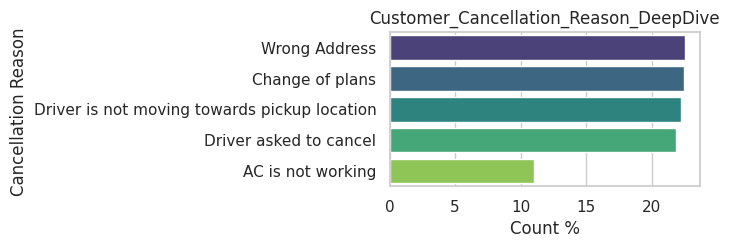

In [136]:
#Ride incompletion status Deep Dive
df_canc = df[df['CANC'] == 1]
cancel_rsn_plot(df_canc,'CANCRsn','Customer_Cancellation_Reason_DeepDive')

CANDRsn
Customer related issue                 25.32
The customer was coughing/sick         25.00
Personal & Car related issues          24.91
More than permitted people in there    24.76
Name: proportion, dtype: float64


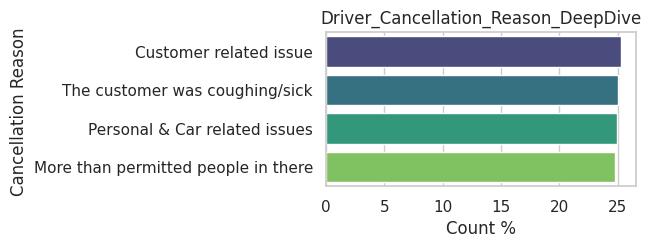

In [137]:
 #Ride incompletion status Deep Dive
df_cand = df[df['CAND'] == 1]
cancel_rsn_plot(df_cand,'CANDRsn','Driver_Cancellation_Reason_DeepDive')

IncompRsn
Customer Demand      33.78
Vehicle Breakdown    33.47
Other Issue          32.76
Name: proportion, dtype: float64


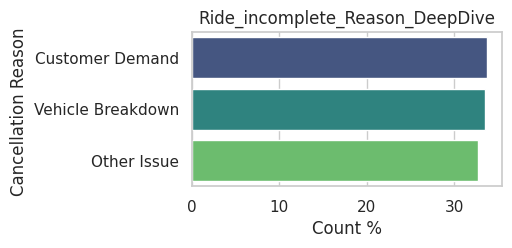

In [138]:
#Ride incompletion status Deep Dive
df_incomp = df[df['Incomp'] == 1]
cancel_rsn_plot(df_incomp,'IncompRsn','Ride_incomplete_Reason_DeepDive')

In [139]:
df['BookStatus'] = df['BookStatus'].map(lambda x: 1 if x == 'Completed' else 0)

/tmp/ipython-input-1799625444.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


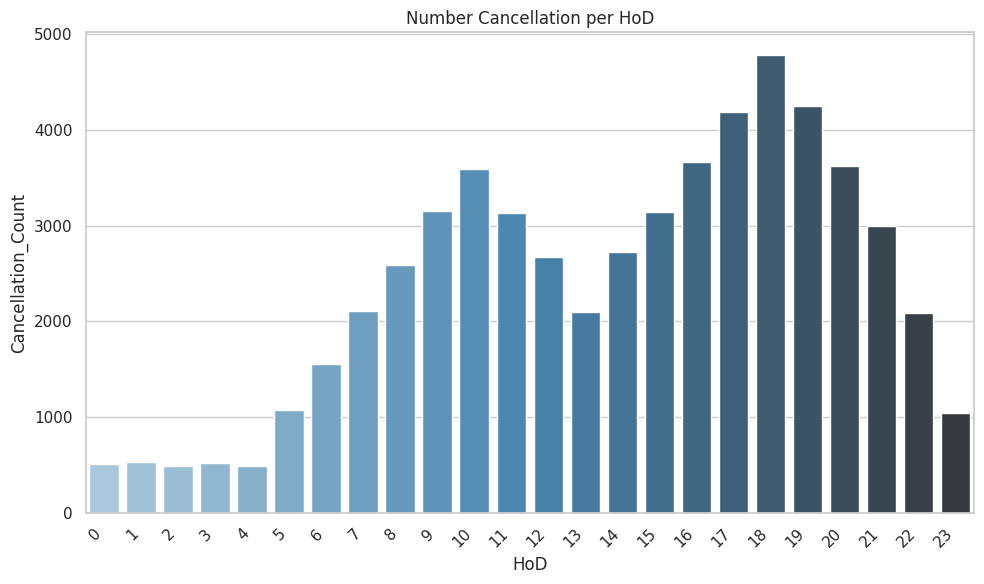

In [140]:
df_cancel = df[df['BookStatus'] == 0]
hod_cancel_counts = (
    df_cancel.groupby('HoD')
      .size()
      .reset_index(name='Cancellation_Count')         # make it a DataFrame with column 'Count'
      .sort_values('Cancellation_Count', ascending=False)
)

import seaborn as sns
import matplotlib.pyplot as plt

# Set a style (optional)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # adjust size as needed

sns.barplot(
    data=hod_cancel_counts,
    x='HoD',
    y='Cancellation_Count',
    palette='Blues_d'        # choose any palette you like
)

plt.title('Number Cancellation per HoD')
plt.xlabel('HoD')
plt.ylabel('Cancellation_Count')

# Rotate x labels if there are many HoDs
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [141]:
hod_ride_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 18 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HoD         24 non-null     int32
 1   Ride_Count  24 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 480.0 bytes


In [142]:
hod_cancel_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 18 to 2
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   HoD                 24 non-null     int32
 1   Cancellation_Count  24 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 480.0 bytes


In [143]:

merged_hod_df = hod_ride_counts.merge(hod_cancel_counts,on='HoD',how='inner')

In [144]:
merged_hod_df['Difference'] = merged_hod_df['Ride_Count'] - merged_hod_df['Cancellation_Count']
merged_hod_df['Cancellation_%'] = 100 * merged_hod_df['Cancellation_Count']/merged_hod_df['Ride_Count']

In [145]:
merged_hod_df['Cancellation_%'].sort_values(ascending=False)

,Cancellation_%
21,39.117647
10,38.700043
14,38.605505
0,38.557716
1,38.462931
17,38.442211
15,38.412057
8,38.344306
13,38.281536
7,38.256012


### Conclusion
Cancellation Percentage across the HoD remains almost same b/w 36% to 39%

In [146]:
merged_hod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HoD                 24 non-null     int32  
 1   Ride_Count          24 non-null     int64  
 2   Cancellation_Count  24 non-null     int64  
 3   Difference          24 non-null     int64  
 4   Cancellation_%      24 non-null     float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 996.0 bytes


### Conclusion :  Cancellation rates high during the office-start and ofice-end hours (8-12) and (15-21)

BookStatus
1    62.0
0    38.0
Name: proportion, dtype: float64


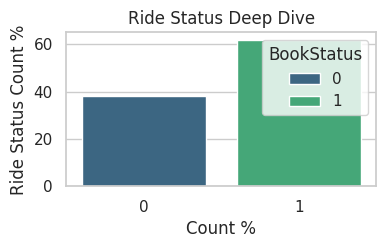

In [147]:
#Ride status Deep Dive

ride_staus_counts = (df['BookStatus'].value_counts(normalize=True) * 100).round(2)
print(ride_staus_counts)
# Plot bar chart
fig, ax = plt.subplots(figsize=(4, 2))
#plt.figure(figsize=(8, 5))
sns.barplot(x=ride_staus_counts.index, y=ride_staus_counts.values, palette="viridis",hue=ride_staus_counts.index)
#axes_ride_ana[1, 1].set_title("Ride Status Deep Dive")

# Add labels and title
plt.title("Ride Status Deep Dive")
plt.ylabel("Ride Status Count %")
plt.xlabel("Count %")
plt.xticks(rotation=0)

#plt.tight_layout()
#plt.show()
fig.set_size_inches(4, 2)
fig_list.append(fig)

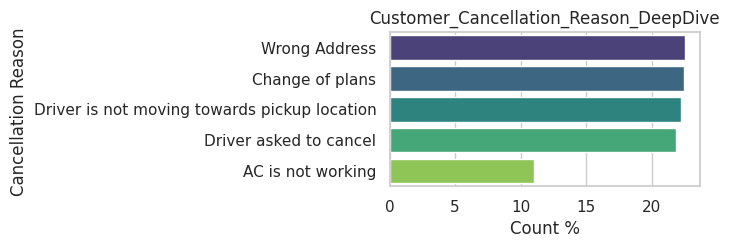

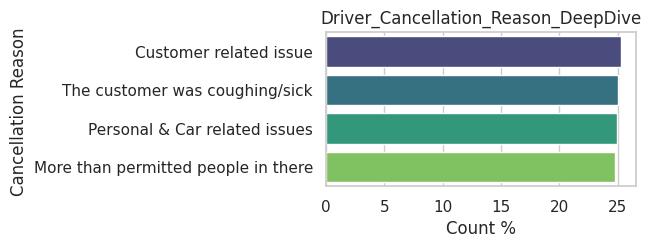

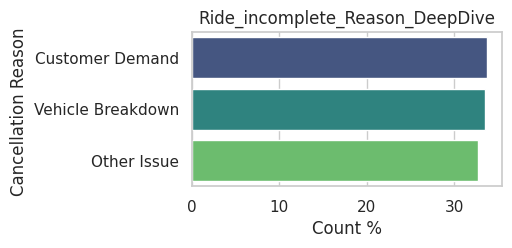

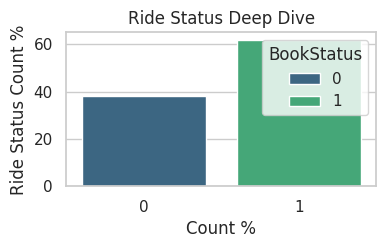

In [148]:

for fig in fig_list:
    display(fig)
    display()


In [149]:
df_cancel = df[df['BookStatus'] == 0]


In [150]:

ride_staus_counts

,proportion
BookStatus,
1,62.0
0,38.0


In [151]:
print(f"completed_Ride % {100 * len(df[df['BookStatus']==1])/150000}")

completed_Ride % 62.0


In [152]:
print(f"Incomplete_Ride % {100 * len(df[df['BookStatus']==0])/150000}")

Incomplete_Ride % 38.0


### Conclusion:


```
completed_Ride % 62.0
Incomplete_Ride % 38.0
```



In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            150000 non-null  object        
 1   Time            150000 non-null  object        
 2   BookID          150000 non-null  object        
 3   BookStatus      150000 non-null  int64         
 4   CustID          150000 non-null  object        
 5   VehType         150000 non-null  object        
 6   PickL           150000 non-null  int64         
 7   DropL           150000 non-null  int64         
 8   VTAT            139500 non-null  float64       
 9   CTAT            102000 non-null  float64       
 10  CANC            10500 non-null   float64       
 11  CANCRsn         10500 non-null   object        
 12  CAND            27000 non-null   float64       
 13  CANDRsn         27000 non-null   object        
 14  Incomp          9000 non-null    flo

In [154]:
#Fill the NULL value
#CTAT, VTAT with mean
df['VTAT'] = pd.to_numeric(df['VTAT'], errors='coerce')
avg_vtat = df['VTAT'].mean()
df.fillna({'VTAT': avg_vtat}, inplace=True)

df['CTAT'] = pd.to_numeric(df['CTAT'], errors='coerce')
avg_ctat = df['CTAT'].mean()
df.fillna({'CTAT': avg_ctat}, inplace=True)

#Fill NaN with average rating per customerID
global_mean = df['CustRat'].mean()
df['CustRat'] = df['CustRat'].fillna(df.groupby('CustID')['CustRat'].transform('mean'))
df['CustRat'] = df['CustRat'].fillna(global_mean)

df['CANCRsn'] = df['CANCRsn'].fillna('Unknown')
df['CANDRsn'] = df['CANDRsn'].fillna('Unknown')
df['IncompRsn'] = df['IncompRsn'].fillna('Unknown')
df['CANC'] = df['CANC'].fillna(0)
df['CAND'] = df['CAND'].fillna(0)
df['Incomp'] = df['Incomp'].fillna(0)



In [155]:
avg_rd_distance = df['Ride Distance'].mean()
df.fillna({'Ride Distance':avg_rd_distance},inplace=True)


In [156]:
avg_booking_val = df['Booking Value'].mean()
df.fillna({'Booking Value':avg_booking_val},inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            150000 non-null  object        
 1   Time            150000 non-null  object        
 2   BookID          150000 non-null  object        
 3   BookStatus      150000 non-null  int64         
 4   CustID          150000 non-null  object        
 5   VehType         150000 non-null  object        
 6   PickL           150000 non-null  int64         
 7   DropL           150000 non-null  int64         
 8   VTAT            150000 non-null  float64       
 9   CTAT            150000 non-null  float64       
 10  CANC            150000 non-null  float64       
 11  CANCRsn         150000 non-null  object        
 12  CAND            150000 non-null  float64       
 13  CANDRsn         150000 non-null  object        
 14  Incomp          150000 non-null  flo

In [158]:
df_bookval_500_1000_cancelled = df[(df['Booking Value'] >= 500) & (df['Booking Value'] <= 1000) & (df['BookStatus'] == 0)]

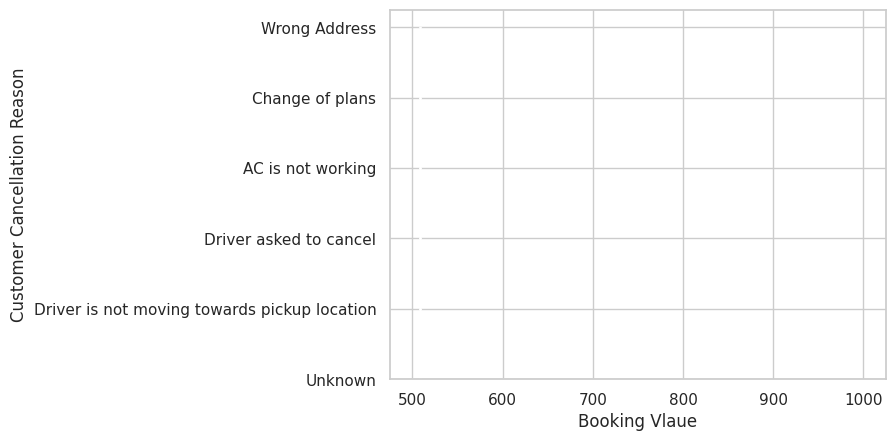

In [159]:
import matplotlib.pyplot as plt
plt.bar(df_bookval_500_1000_cancelled['Booking Value'],df_bookval_500_1000_cancelled['CANCRsn'])
plt.xlabel("Booking Vlaue")
plt.ylabel("Customer Cancellation Reason")
plt.show()

In [160]:
tmp_gr = df_bookval_500_1000_cancelled.groupby('CANCRsn').size().rename("ReasonCount").reset_index()

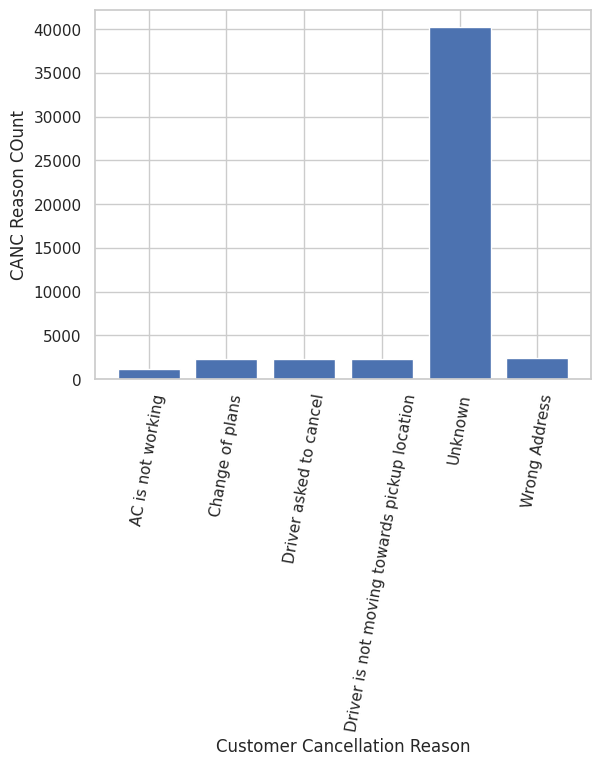

In [161]:
from numpy import angle
import matplotlib.pyplot as plt
plt.bar(tmp_gr['CANCRsn'],tmp_gr['ReasonCount'])
plt.ylabel("CANC Reason COunt")
plt.xlabel("Customer Cancellation Reason")
plt.xticks(rotation=80)
plt.show()

In [162]:
tmp_gr = df_bookval_500_1000_cancelled.groupby('CANDRsn').size().rename("ReasonCount").reset_index()

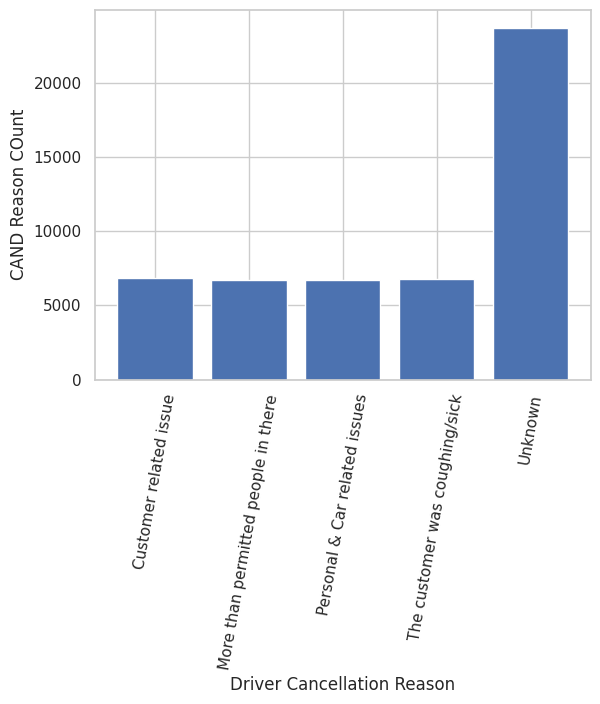

In [163]:
from numpy import angle
import matplotlib.pyplot as plt
plt.bar(tmp_gr['CANDRsn'],tmp_gr['ReasonCount'])
plt.ylabel("CAND Reason COunt")
plt.xlabel("Driver Cancellation Reason")
plt.xticks(rotation=80)
plt.show()

### Conclusion :

*   Not much insight in the current dataset on the real reasons (customer and driver) for the major cancellations.
*   We need more more insight into the ride cancellation reasons maked as "Unknown" both for the rides cancelled by the driver and customer.




In [164]:
tmp_gr

,CANDRsn,ReasonCount
0,Customer related issue,6837
1,More than permitted people in there,6686
2,Personal & Car related issues,6726
3,The customer was coughing/sick,6751
4,Unknown,23745


In [165]:
df_bookval_500_1000_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50745 entries, 0 to 149992
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            50745 non-null  object        
 1   Time            50745 non-null  object        
 2   BookID          50745 non-null  object        
 3   BookStatus      50745 non-null  int64         
 4   CustID          50745 non-null  object        
 5   VehType         50745 non-null  object        
 6   PickL           50745 non-null  int64         
 7   DropL           50745 non-null  int64         
 8   VTAT            50745 non-null  float64       
 9   CTAT            50745 non-null  float64       
 10  CANC            50745 non-null  float64       
 11  CANCRsn         50745 non-null  object        
 12  CAND            50745 non-null  float64       
 13  CANDRsn         50745 non-null  object        
 14  Incomp          50745 non-null  float64       
 15  Incomp

In [169]:
df['CustRat'].unique()

array([4.40458387, 4.9       , 5.        , 4.3       , 4.6       ,
       4.1       , 4.2       , 4.7       , 4.4       , 3.6       ,
       4.5       , 3.3       , 3.8       , 3.7       , 4.8       ,
       3.9       , 3.4       , 3.2       , 3.1       , 4.        ,
       3.        , 3.5       ])

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            150000 non-null  object        
 1   Time            150000 non-null  object        
 2   BookID          150000 non-null  object        
 3   BookStatus      150000 non-null  int64         
 4   CustID          150000 non-null  object        
 5   VehType         150000 non-null  object        
 6   PickL           150000 non-null  int64         
 7   DropL           150000 non-null  int64         
 8   VTAT            150000 non-null  float64       
 9   CTAT            150000 non-null  float64       
 10  CANC            150000 non-null  float64       
 11  CANCRsn         150000 non-null  object        
 12  CAND            150000 non-null  float64       
 13  CANDRsn         150000 non-null  object        
 14  Incomp          150000 non-null  flo

In [189]:

# Group by 'PickL' and count completed == 0 and completed == 1
result = df.groupby('PickL')['BookStatus'].value_counts().unstack(fill_value=0)

# Rename columns
result.columns = ['BookStatus_0', 'BookStatus_1']


# Reset index if needed
result = result.reset_index()
result['BookStatus_0_%'] = 100 * result['BookStatus_0']/(result['BookStatus_0'] + result['BookStatus_1'])
result['BookStatus_1_%'] = 100 - result['BookStatus_0_%']
result = result.sort_values('BookStatus_0_%',ascending=False).reset_index()
print(result)


#Define bins and labels
bins = [0, 20,30, 40,50, 60, 80, 100]  # intervals
labels = ['0-20', '20-30', '30-40','40-50','50-60', '60-80', '80-100']
result['Cancel_%'] = pd.cut(result['BookStatus_0_%'], bins=bins, labels=labels)
print(result)




     index  PickL  BookStatus_0  BookStatus_1  BookStatus_0_%  BookStatus_1_%
0      172    172           373           450       45.321993       54.678007
1        2      2           368           471       43.861740       56.138260
2       24     24           347           482       41.857660       58.142340
3       14     14           362           506       41.705069       58.294931
4      124    124           382           538       41.521739       58.478261
..     ...    ...           ...           ...             ...             ...
171    129    129           300           550       35.294118       64.705882
172     57     57           296           544       35.238095       64.761905
173    175    175           290           534       35.194175       64.805825
174    156    156           305           582       34.385569       65.614431
175    174    174           282           554       33.732057       66.267943

[176 rows x 6 columns]
     index  PickL  BookStatus_0  BookSta

In [190]:
gr_drop_canc = result.groupby('Cancel_%').size().rename('cancel_bin_count').reset_index()
gr_drop_canc


/tmp/ipython-input-982712387.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr_drop_canc = result.groupby('Cancel_%').size().rename('cancel_bin_count').reset_index()


,Cancel_%,cancel_bin_count
0,0-20,0
1,20-30,0
2,30-40,156
3,40-50,20
4,50-60,0
5,60-80,0
6,80-100,0


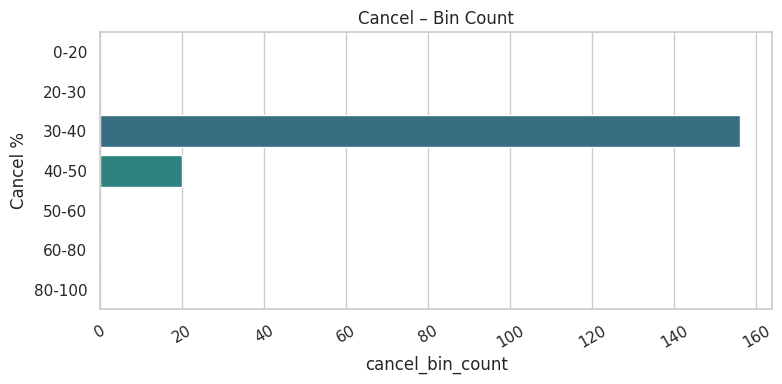

In [191]:
    # 4) Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(
        data=gr_drop_canc,
        x='cancel_bin_count',
        y='Cancel_%',
        hue='Cancel_%',          # required if you use a palette in new seaborn
        palette='viridis',
        legend=False
    )
    plt.title(f"Cancel – Bin Count")
    plt.ylabel("Cancel %")
    plt.xlabel("cancel_bin_count")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

### Conclusion : No correlation b/w the pickup location and cancellation. 95% of the locations has got the cancellation rate of 30-40%

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            150000 non-null  object        
 1   Time            150000 non-null  object        
 2   BookID          150000 non-null  object        
 3   BookStatus      150000 non-null  int64         
 4   CustID          150000 non-null  object        
 5   VehType         150000 non-null  object        
 6   PickL           150000 non-null  int64         
 7   DropL           150000 non-null  int64         
 8   VTAT            150000 non-null  float64       
 9   CTAT            150000 non-null  float64       
 10  CANC            150000 non-null  float64       
 11  CANCRsn         150000 non-null  object        
 12  CAND            150000 non-null  float64       
 13  CANDRsn         150000 non-null  object        
 14  Incomp          150000 non-null  flo

               Booking Value  BookStatus
Booking Value       1.000000   -0.000461
BookStatus         -0.000461    1.000000


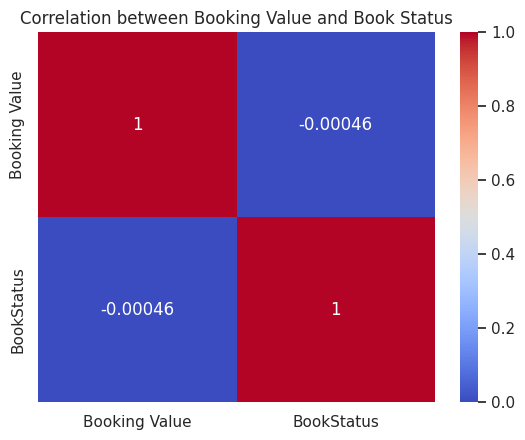

In [193]:
#Correlation b/w the Booking Value and cancellation rate
df_temp = df[['Booking Value','BookStatus']]
df_temp

corr = df_temp[['Booking Value', 'BookStatus']].corr()
print(corr)

# Visualize correlation using Seaborn heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Booking Value and Book Status')
plt.show()



In [194]:
df_temp['Booking Value'].max()

4277.0

In [195]:
df_temp['Booking Value'].min()

50.0

In [196]:
df_temp['Booking Value'].mean()

np.float64(508.295911764706)

In [197]:
df_temp

,Booking Value,BookStatus
0,508.295912,0
1,237.000000,0
2,627.000000,1
3,416.000000,1
4,737.000000,1
...,...,...
149995,475.000000,1
149996,1093.000000,1
149997,852.000000,1
149998,333.000000,1


In [198]:
#Define bins and labels
bins = [0,500, 1000,1500,2000, 5000]  # intervals
labels = ['0-500', '501-1000','1001-1500', '1501-2000','2001-5000']
df_temp['Booking_Value_Bin'] = pd.cut(df_temp['Booking Value'], bins=bins, labels=labels)
gr_df_temp = df_temp.groupby('Booking_Value_Bin').size().rename('Booking_Value_Bin_count').reset_index().sort_values('Booking_Value_Bin_count',ascending=False)
gr_df_temp

/tmp/ipython-input-2752359688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Booking_Value_Bin'] = pd.cut(df_temp['Booking Value'], bins=bins, labels=labels)
/tmp/ipython-input-2752359688.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr_df_temp = df_temp.groupby('Booking_Value_Bin').size().rename('Booking_Value_Bin_count').reset_index().sort_values('Booking_Value_Bin_count',ascending=False)


,Booking_Value_Bin,Booking_Value_Bin_count
1,501-1000,79015
0,0-500,62964
2,1001-1500,5641
3,1501-2000,1407
4,2001-5000,973


In [199]:

# Group by Booking_Value_Bin and count BookStatus values
result1 = (
    df_temp.groupby('Booking_Value_Bin')['BookStatus']
    .value_counts()
    .unstack(fill_value=0)  # Convert to columns for 0 and 1
    .reset_index()
)

# Rename columns for clarity
result1.columns = ['Booking_Value_Bin', 'BookStatus_0_count', 'BookStatus_1_count']
result1['Cancellation_%'] = 100 * result1['BookStatus_0_count']/(result1['BookStatus_0_count'] + result1['BookStatus_1_count'])
result1['Completion_%'] = 100 - result1['Cancellation_%']
print(result1)


  Booking_Value_Bin  BookStatus_0_count  BookStatus_1_count  Cancellation_%  \
0             0-500                5539               57425        8.797090   
1          501-1000               50738               28277       64.213124   
2         1001-1500                 518                5123        9.182769   
3         1501-2000                 120                1287        8.528785   
4         2001-5000                  85                 888        8.735868   

   Completion_%  
0     91.202910  
1     35.786876  
2     90.817231  
3     91.471215  
4     91.264132  


/tmp/ipython-input-2667527103.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp.groupby('Booking_Value_Bin')['BookStatus']


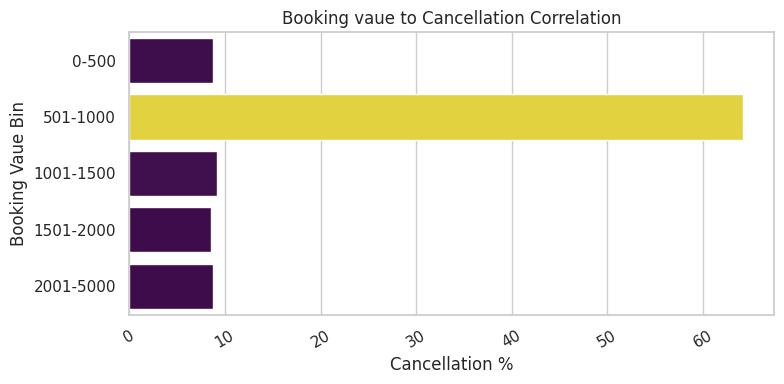

In [200]:
    # 4) Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(
        data=result1,
        x='Cancellation_%',
        y='Booking_Value_Bin',
        hue='Cancellation_%',          # required if you use a palette in new seaborn
        palette='viridis',
        legend=False
    )
    plt.title(f"Booking vaue to Cancellation Correlation")
    plt.ylabel("Booking Vaue Bin")
    plt.xlabel("Cancellation %")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

In [201]:
result1['Total_Rides'] = result1['BookStatus_0_count'] + result1['BookStatus_1_count']
result1['Total_Rides_%'] = 100 * result1['Total_Rides']/150000
print(result1.sort_values('Total_Rides_%',ascending=False).reset_index())

   index Booking_Value_Bin  BookStatus_0_count  BookStatus_1_count  \
0      1          501-1000               50738               28277   
1      0             0-500                5539               57425   
2      2         1001-1500                 518                5123   
3      3         1501-2000                 120                1287   
4      4         2001-5000                  85                 888   

   Cancellation_%  Completion_%  Total_Rides  Total_Rides_%  
0       64.213124     35.786876        79015      52.676667  
1        8.797090     91.202910        62964      41.976000  
2        9.182769     90.817231         5641       3.760667  
3        8.528785     91.471215         1407       0.938000  
4        8.735868     91.264132          973       0.648667  


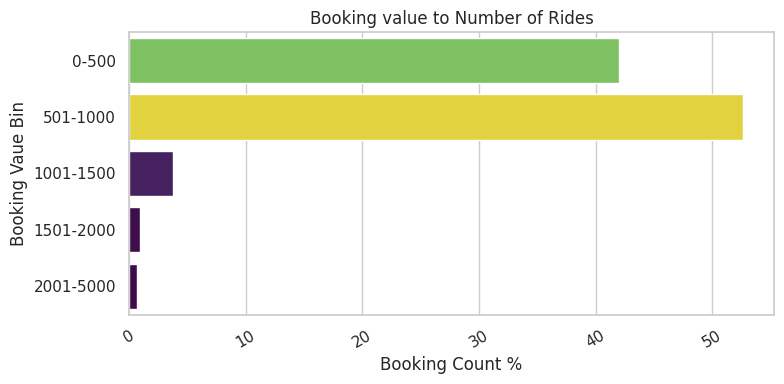

In [202]:
plt.figure(figsize=(8, 4))
sns.barplot(
      data=result1,
      x='Total_Rides_%',
      y='Booking_Value_Bin',
      hue='Total_Rides_%',          # required if you use a palette in new seaborn
      palette='viridis',
      legend=False
  )
plt.title(f"Booking value to Number of Rides")
plt.ylabel("Booking Vaue Bin")
plt.xlabel("Booking Count %")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

###Conclusion
1. Booking_value_0_500, 42% of of total booking, **cacellation 9%**
2. Booking_vlaue_501_1000, 53% of the Total Booking, **Cancellation 64%.**
So something is very unusal about the Booking_vlaue_501_1000.

We need to focus on how to reduce the cancellation % in this segment, Few suggestions,
1. Checking Uber commission formula, may be drivers are losing out for picking up trip in this segment.
2. Incentivising the drivers better for completing rides in this segment
3. Extra-crdits for completing rides in this segment


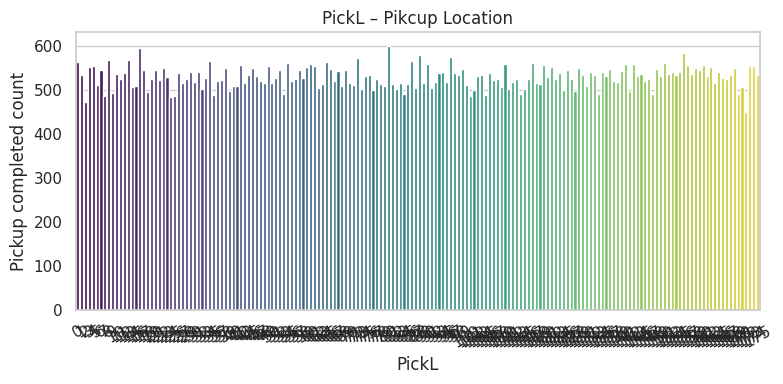

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_complete = df[df['BookStatus'] == 1]

# Example: columns you want to analyze
cols_to_plot = ['PickL']  # replace with your actual columns

for col in cols_to_plot:
    # 1) Groupby + count
    grp_df = df_complete.groupby('PickL').size().rename('Pickup_count').reset_index().sort_values(by='Pickup_count',ascending=False)


    # 4) Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(
        data=grp_df,
        x=col,
        y='Pickup_count',
        hue=col,          # required if you use a palette in new seaborn
        palette='viridis',
        legend=False
    )
    plt.title(f"{col} – Pikcup Location")
    plt.ylabel("Pickup completed count")
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


### Conclusion : The number of pickups per location ranges b/w 400-600 and the cancellation % also ranges

         VehType  Cancel_percentage
0           Auto              25.02
2        Go Mini              19.75
3       Go Sedan              18.36
1           Bike              14.88
4  Premier Sedan              12.03
6          eBike               7.03
5        Uber XL               2.92
     PickL  Cancel_percentage
124    124               0.67
141    141               0.66
2        2               0.65
172    172               0.65
14      14               0.64
..     ...                ...
111    111               0.52
175    175               0.51
71      71               0.51
85      85               0.50
174    174               0.49

[176 rows x 2 columns]


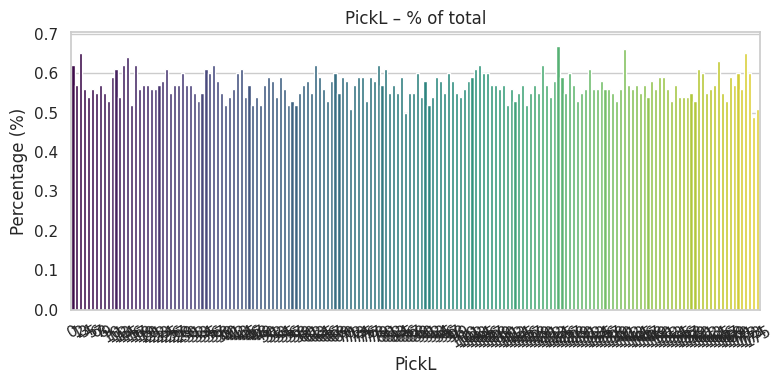

     DropL  Cancel_percentage
17      17               0.65
71      71               0.65
129    129               0.65
37      37               0.64
98      98               0.64
..     ...                ...
125    125               0.51
126    126               0.50
109    109               0.50
5        5               0.49
84      84               0.49

[176 rows x 2 columns]


In [205]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_incomplete = df[df['BookStatus'] == 0]

# Example: columns you want to analyze
cols_to_plot = ['VehType', 'PickL', 'DropL']  # replace with your actual columns

for col in cols_to_plot:
    # 1) Groupby + count
    grp = df_incomplete.groupby(col).size()

    # 2) Convert to percentage of total
    perc = (grp / grp.sum() * 100).round(2)

    # 3) Put into a DataFrame for seaborn
    plot_df = perc.reset_index()
    plot_df.columns = [col, 'Cancel_percentage']
    print(plot_df.sort_values('Cancel_percentage',ascending=False))
    #Save PickL counter for later use
    if(col == 'PickL'):
      # 4) Plot
      plt.figure(figsize=(8, 4))
      sns.barplot(
          data=plot_df,
          x=col,
          y='Cancel_percentage',
          hue=col,          # required if you use a palette in new seaborn
          palette='viridis',
          legend=False
      )
      plt.title(f"{col} – % of total")
      plt.ylabel("Percentage (%)")
      plt.xlabel(col)
      plt.xticks(rotation=30)
      plt.tight_layout()
      plt.show()


In [206]:
grp = df_incomplete.groupby('PickL').size().rename('Pickup_count').reset_index().sort_values(by='Pickup_count',ascending=False)
#grp.columns = ['PickL','Pickup_count']

grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 124 to 174
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PickL         176 non-null    int64
 1   Pickup_count  176 non-null    int64
dtypes: int64(2)
memory usage: 4.1 KB


### Conclusion ⁉


1.   All the pickup and drop point has the similar cancellation rates, so no information could be derived on the supply issue in the particular area
2.   VehicalTyple Auto has the highest cancellation rates




In [207]:
df_incomplete.groupby('CustID').size().sort_values(ascending=False)

,0
CustID,
"""CID9034742""",2
"""CID7952632""",2
"""CID5125804""",2
"""CID2970365""",2
"""CID5984338""",2
...,...
"""CID4031707""",1
"""CID4031982""",1
"""CID4032426""",1


### Conclusion : Max trips cancelled per customerID is just 2 so there is NO correlation b/w the customerID and cancellation


In [208]:
def heat_map(data):
    # Create a figure for the heatmap
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Calculate the correlation between "BookingStatus" and all other columns, sort by correlation
    correlations = data.corr()["BookStatus"].to_frame().sort_values(
        by="BookStatus",
        ascending=False
    )

    # Generate the heatmap with annotations using the "Blues" colormap
    sns.heatmap(correlations, annot=True, cmap="Blues")

    # Set the title for the heatmap
    plt.title("Correlation Heatmap")

    # Show the plot
    plt.show()

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            150000 non-null  object        
 1   Time            150000 non-null  object        
 2   BookID          150000 non-null  object        
 3   BookStatus      150000 non-null  int64         
 4   CustID          150000 non-null  object        
 5   VehType         150000 non-null  object        
 6   PickL           150000 non-null  int64         
 7   DropL           150000 non-null  int64         
 8   VTAT            150000 non-null  float64       
 9   CTAT            150000 non-null  float64       
 10  CANC            150000 non-null  float64       
 11  CANCRsn         150000 non-null  object        
 12  CAND            150000 non-null  float64       
 13  CANDRsn         150000 non-null  object        
 14  Incomp          150000 non-null  flo

In [210]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
def encode_col(df,col):
  # Get the list of the values
  col_val = df[col].unique().tolist()

  # Fit LabelEncoder on all unique values
  encoder = LabelEncoder()
  encoder.fit(col_val)

  # Encode both columns
  df[col] = encoder.transform(df[col])
  return df, col_val

In [211]:
df , CANCRsn = encode_col(df,'CANCRsn')
df, CANDRsn = encode_col(df,'CANDRsn')
df , IncompRsn = encode_col(df,'IncompRsn')
df , VehType = encode_col(df,'VehType')

In [212]:
for i in range(0,5):
  ret = decode_geo(i,CANDRsn)
  print(i,ret)

0 Customer related issue
1 More than permitted people in there
2 Personal & Car related issues
3 The customer was coughing/sick
4 Unknown


In [213]:
for i in range(0,6):
  ret = decode_geo(i,CANCRsn)
  print(i,ret)

0 AC is not working
1 Change of plans
2 Driver asked to cancel
3 Driver is not moving towards pickup location
4 Unknown
5 Wrong Address


In [214]:
df['IncompRsn'].unique()

array([2, 3, 1, 0])

In [215]:
for i in range(0,4):
  ret = decode_geo(i,IncompRsn)
  print(i,ret)

0 Customer Demand
1 Other Issue
2 Unknown
3 Vehicle Breakdown


In [216]:
df.drop(columns=['Date','Time','BookID','Driver Ratings','DateTime','Payment Method','CustID'],inplace=True)

In [217]:
df_incomplete=df[df['BookStatus'] == 0]

In [218]:
df_incomplete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57000 entries, 0 to 149992
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BookStatus      57000 non-null  int64  
 1   VehType         57000 non-null  int64  
 2   PickL           57000 non-null  int64  
 3   DropL           57000 non-null  int64  
 4   VTAT            57000 non-null  float64
 5   CTAT            57000 non-null  float64
 6   CANC            57000 non-null  float64
 7   CANCRsn         57000 non-null  int64  
 8   CAND            57000 non-null  float64
 9   CANDRsn         57000 non-null  int64  
 10  Incomp          57000 non-null  float64
 11  IncompRsn       57000 non-null  int64  
 12  Booking Value   57000 non-null  float64
 13  Ride Distance   57000 non-null  float64
 14  CustRat         57000 non-null  float64
 15  DoM             57000 non-null  int32  
 16  month           57000 non-null  int32  
 17  HoD             57000 non-null  int

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


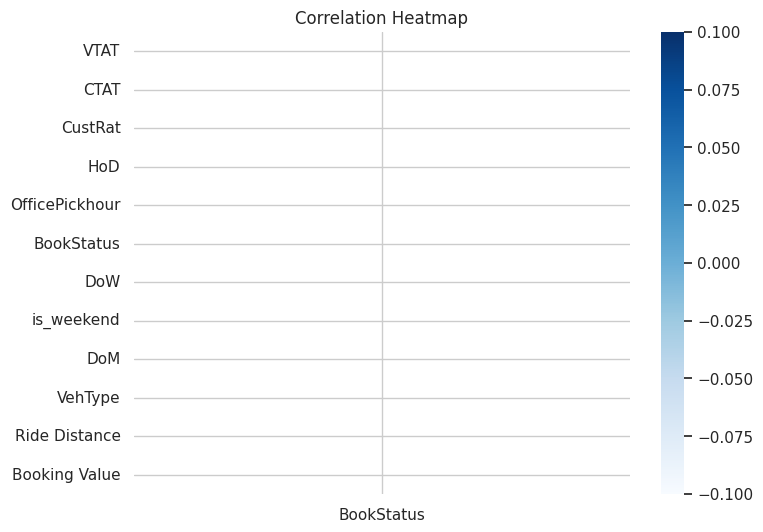

In [219]:
num_columns = ['VTAT','CTAT','CustRat','HoD','OfficePickhour','BookStatus','DoW','is_weekend','DoM','VehType','Ride Distance','Booking Value']
df_num_col = df_incomplete[num_columns]
heat_map(df_num_col)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BookStatus      150000 non-null  int64  
 1   VehType         150000 non-null  int64  
 2   PickL           150000 non-null  int64  
 3   DropL           150000 non-null  int64  
 4   VTAT            150000 non-null  float64
 5   CTAT            150000 non-null  float64
 6   CANC            150000 non-null  float64
 7   CANCRsn         150000 non-null  int64  
 8   CAND            150000 non-null  float64
 9   CANDRsn         150000 non-null  int64  
 10  Incomp          150000 non-null  float64
 11  IncompRsn       150000 non-null  int64  
 12  Booking Value   150000 non-null  float64
 13  Ride Distance   150000 non-null  float64
 14  CustRat         150000 non-null  float64
 15  DoM             150000 non-null  int32  
 16  month           150000 non-null  int32  
 17  HoD       

## Model Building

In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def feature_imp(df):
  # Example DataFrame
  # Assume df has columns: user_ctr, product_ctr, hour, day_of_week, clicked (target)
  X = df.drop(columns='BookStatus')

  y = df['BookStatus']

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

  # Random Forest for feature importance
  rf = RandomForestClassifier(n_estimators=100, random_state=42)
  rf.fit(X_train, y_train)

  # Feature importance
  importances = pd.Series(rf.feature_importances_, index=X.columns)
  print(importances.sort_values(ascending=False))

In [222]:
col_list = ['CustRat','CTAT','VTAT','DropL','PickL','VehType','HoD','BookStatus','Ride Distance','Booking Value']
sub_df = df[col_list]
feature_imp(sub_df)

CustRat          0.334910
Ride Distance    0.297044
CTAT             0.252292
Booking Value    0.098972
VTAT             0.015492
PickL            0.000423
DropL            0.000401
HoD              0.000277
VehType          0.000189
dtype: float64


In [223]:
#Keep only the final input columns that would be availble at the time of booking the cab
df.drop(columns=['CANC','CANCRsn','CAND','CANDRsn','Incomp','IncompRsn','DoM','month','DoW','OfficePickhour'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BookStatus     150000 non-null  int64  
 1   VehType        150000 non-null  int64  
 2   PickL          150000 non-null  int64  
 3   DropL          150000 non-null  int64  
 4   VTAT           150000 non-null  float64
 5   CTAT           150000 non-null  float64
 6   Booking Value  150000 non-null  float64
 7   Ride Distance  150000 non-null  float64
 8   CustRat        150000 non-null  float64
 9   HoD            150000 non-null  int32  
 10  is_weekend     150000 non-null  int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 12.0 MB


In [224]:
feature_imp(df)

CustRat          0.330544
Ride Distance    0.284671
CTAT             0.249186
Booking Value    0.112927
VTAT             0.020748
DropL            0.000578
PickL            0.000559
HoD              0.000385
VehType          0.000232
is_weekend       0.000170
dtype: float64




```
# This is formatted as code
```

### Conclusion : **Feature Importance**


```
CustRat          0.330544
Ride Distance    0.284671
CTAT             0.249186
Booking Value    0.112927
VTAT             0.020748
DropL            0.000578
PickL            0.000559
HoD              0.000385
VehType          0.000232
is_weekend       0.000170
dtype: float64
```



In [225]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import requests
import io
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
import joblib
#from catboost import CatBoostClassifier, Pool

In [226]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

models = {  # Dictionary of models to be evaluated

        #"Logistic Regression": LogisticRegression(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Gaussian Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
        "XGBClassifier":XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4,subsample=0.8,colsample_bytree=0.8,eval_metric='logloss')
    }

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BookStatus     150000 non-null  int64  
 1   VehType        150000 non-null  int64  
 2   PickL          150000 non-null  int64  
 3   DropL          150000 non-null  int64  
 4   VTAT           150000 non-null  float64
 5   CTAT           150000 non-null  float64
 6   Booking Value  150000 non-null  float64
 7   Ride Distance  150000 non-null  float64
 8   CustRat        150000 non-null  float64
 9   HoD            150000 non-null  int32  
 10  is_weekend     150000 non-null  int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 12.0 MB


In [228]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred)

    # Calculate recall
    recall = recall_score(y_true, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, cm

In [229]:
def run_model(df,model,name):
  #X,y
  X = df.drop('BookStatus',axis=1)
  y = df['BookStatus']

  #split
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=99,stratify=y)

  #optimization don't apply SMOTE

  # Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training set
  #smote = SMOTE(random_state=42)
  #X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
  X_train_resampled = X_train
  y_train_resampled = y_train


  # Fit the model on the resampled training data
  model.fit(X_train_resampled, y_train_resampled)

  # Make predictions on the test set
  predictions = model.predict(X_test)

  # Return the model's predictions and the actual labels (y_test)
  return predictions, y_test

In [230]:
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier

def models_eva(data):
    results = []  # Initialize a list to store results
    cm_data = []  # Initialize a list to store confusion matrix data
    roc_data = []  # Initialize a list to store ROC curve data
    #models = {  # Dictionary of models to be evaluated

     #     "XGBClassifier":XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4,subsample=0.8,colsample_bytree=0.8,eval_metric='logloss')
    #}

    # Iterate through the models
    for name, model in models.items():
    #name = "XGBClassifier"
    #for lr in np.arange(0.1,2.0,0.2):
        # Run the model and get predictions and actual labels
        #model = XGBClassifier(n_estimators=100, learning_rate=lr, max_depth=4,subsample=0.8,colsample_bytree=0.8,eval_metric='logloss')
        predictions, y_test = run_model(data, model, name)

        # Evaluate the model and calculate metrics
        accuracy, precision, recall, f1, cm = evaluate_model(y_test, predictions)

        # Calculate ROC curve data
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)

        # Store the results in a dictionary
        results.append({
            "Model": name,
            #"LearningRate": lr,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

        cm_data.append({
            "Model": name,
            #"LearningRate": lr,
            "Matrix": cm
        })

        # Store ROC curve data in a dictionary
        roc_data.append({
            "Model": name,
            #"LearningRate": lr,
            "FPR": fpr.tolist(),
            "TPR": tpr.tolist(),
            "AUC": roc_auc
        })

    # Create a DataFrame from the results, round the values, and sort by accuracy
    results_df = pd.DataFrame(results).round(4).sort_values(by="Accuracy", ascending=False)

    return results_df, cm_data, roc_data

In [231]:
def pipeline(data):
    # Step 1: Classify columns as categorical or numerical
    # All features are categorical

    #map catogorical data to numeric data : Done

    # Step 2: Remove outliers from the dataset : Not required


    # Step 3: Scale the numerical features : All features are categorical so this is not applicable
    #scaled_data = scale_data(cleaned_data, cat_col, num_col)

    #predictions, y_test = run_model(scaled_data, LogisticRegression(), "Logistic Regression")

    # Step 4: Evaluate model performance using different models
    performance, cm_data, roc_data = models_eva(data)


    return performance, cm_data, roc_data

In [232]:
sample_df = df.sample(frac=0.4,random_state=99)
performance, cm_data, roc_data = pipeline(sample_df)
print(performance)

                    Model  Accuracy  Precision  Recall  F1 Score
5           Random Forest    0.9996     0.9994  1.0000    0.9997
0       Gradient Boosting    0.9995     0.9994  0.9998    0.9996
7           XGBClassifier    0.9994     0.9991  1.0000    0.9996
1                AdaBoost    0.9994     0.9991  1.0000    0.9996
4           Decision Tree    0.9989     0.9994  0.9989    0.9992
2    Gaussian Naive Bayes    0.9308     0.9356  0.9546    0.9450
3     K-Nearest Neighbors    0.9287     0.9209  0.9687    0.9442
6  Support Vector Machine    0.8401     0.9300  0.8036    0.8622


In [233]:
def plot_confusion_matrix(cm, labels, model_name, ax):
    # Create an image of the confusion matrix
    im = ax.imshow(cm, interpolation='nearest')

    # Add a colorbar to the plot
    ax.figure.colorbar(im, ax=ax)

    # Set axis labels and title
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           title=f'Confusion Matrix for {model_name}',
           ylabel='True label',
           xlabel='Predicted label')

    # Add text annotations for each cell in the matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="w")

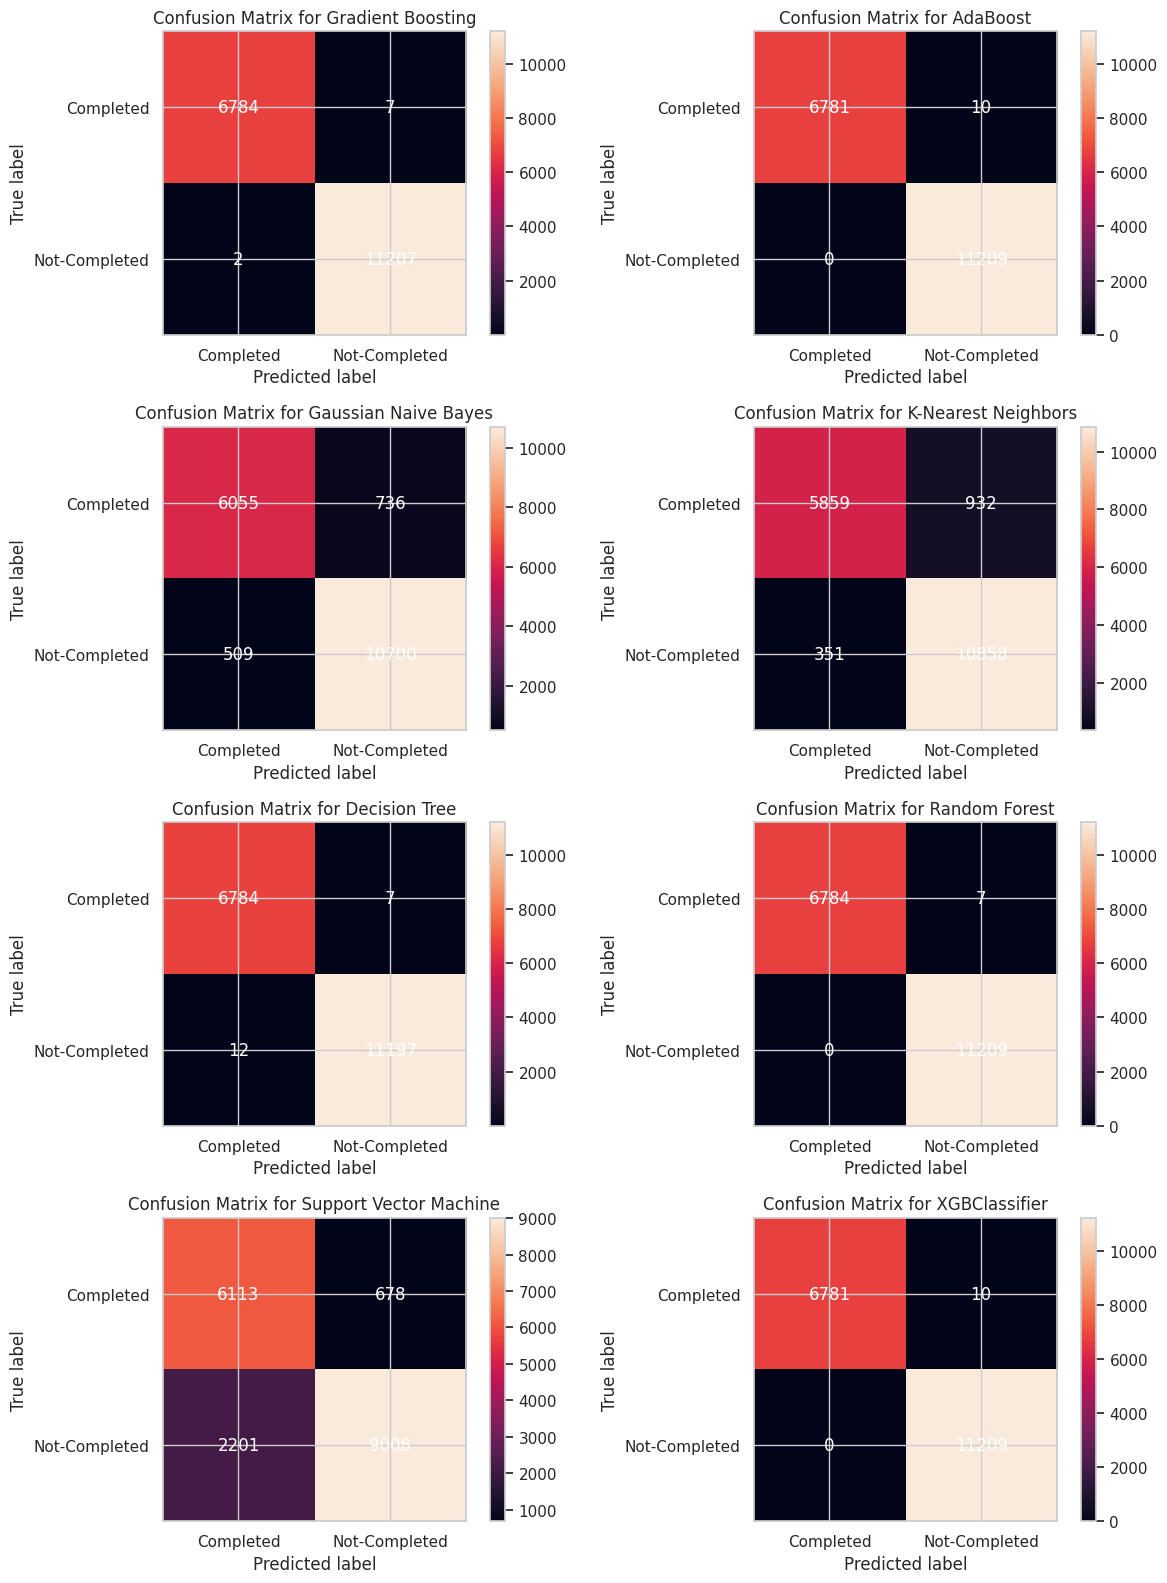

In [234]:
import matplotlib.pyplot as plt
import numpy as np

# Labels for confusion matrix
labels = ['Completed', 'Not-Completed']

# Loop through each model and plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # Adjust grid size
axes = axes.flatten()

for i, entry in enumerate(cm_data):
    cm = entry['Matrix']
    model_name = entry['Model']
    plot_confusion_matrix(cm, labels, model_name, axes[i])

plt.tight_layout()
plt.show()

### By Looking at the Confusion Matrix and other performance parameters, following two models are looking the best fit:
1.   Matrix Gradiant boosting
2.   Random forrest



In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BookStatus     150000 non-null  int64  
 1   VehType        150000 non-null  int64  
 2   PickL          150000 non-null  int64  
 3   DropL          150000 non-null  int64  
 4   VTAT           150000 non-null  float64
 5   CTAT           150000 non-null  float64
 6   Booking Value  150000 non-null  float64
 7   Ride Distance  150000 non-null  float64
 8   CustRat        150000 non-null  float64
 9   HoD            150000 non-null  int32  
 10  is_weekend     150000 non-null  int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 12.0 MB


In [236]:
def create_final_model(df):
  print("Creating the Final Model")


  X = df.drop('BookStatus', axis=1)  # Features
  y = df['BookStatus']               # Target

  X_train, X_test, y_train, y_test = train_test_split(
      X, y,
      test_size=0.2,        # 20% for testing
      shuffle=False,        # First 80% for Train and rest 20% for Test
      )


  # Create final model
  final_model = GradientBoostingClassifier(
                n_estimators=200,
                learning_rate=0.05,
                max_depth=3,
                subsample=0.8,
                max_features='sqrt'
                )


  # Train on full training data
  final_model.fit(X_train, y_train)

  #Eveluate the model
  y_pred_prob = final_model.predict_proba(X_test)[:, 1]
  roc_auc = roc_auc_score(y_test, y_pred_prob)
  print(f"Test ROC AUC: {roc_auc:.4f}")


  y_pred = final_model.predict(X_test)
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Recall:", recall_score(y_test, y_pred))
  print("F1 score", f1_score(y_test,y_pred))

  #increasee the precision threshold
  threshold = 0.7
  y_pred_custom = (y_pred_prob >= threshold).astype(int)
  print("Precision:", precision_score(y_test, y_pred_custom))

  #Save model for later use
  joblib.dump(final_model, "GradientBoostingClassifier.pkl")
  print("Model saved as GradientBoostingClassifier.pkl")

In [237]:
sample_df = df.sample(frac=1,random_state=99)
create_final_model(sample_df)

Creating the Final Model
Test ROC AUC: 0.9999
Accuracy: 0.9994333333333333
Recall: 1.0
F1 score 0.9995384072334301
Precision: 0.9990772404060142
Model saved as GradientBoostingClassifier.pkl


In [238]:
print(df_canc)

              Date      Time        BookID             BookStatus  \
18      2024-11-24  09:07:10  "CNR6126048"  Cancelled by Customer   
39      2024-09-10  13:02:42  "CNR4218487"  Cancelled by Customer   
46      2024-08-02  07:17:07  "CNR4862806"  Cancelled by Customer   
62      2024-02-09  11:15:59  "CNR2497989"  Cancelled by Customer   
78      2024-11-25  08:29:14  "CNR2601752"  Cancelled by Customer   
...            ...       ...           ...                    ...   
149943  2024-05-01  16:39:56  "CNR3486851"  Cancelled by Customer   
149952  2024-04-10  09:33:06  "CNR8257559"  Cancelled by Customer   
149956  2024-10-10  18:34:10  "CNR6030764"  Cancelled by Customer   
149963  2024-02-04  10:51:54  "CNR4272547"  Cancelled by Customer   
149965  2024-10-10  21:49:49  "CNR5276775"  Cancelled by Customer   

              CustID   VehType  PickL  DropL  VTAT  CTAT  ...  Driver Ratings  \
18      "CID1060329"     eBike     75      4  12.4   NaN  ...             NaN   
39      "

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BookStatus     150000 non-null  int64  
 1   VehType        150000 non-null  int64  
 2   PickL          150000 non-null  int64  
 3   DropL          150000 non-null  int64  
 4   VTAT           150000 non-null  float64
 5   CTAT           150000 non-null  float64
 6   Booking Value  150000 non-null  float64
 7   Ride Distance  150000 non-null  float64
 8   CustRat        150000 non-null  float64
 9   HoD            150000 non-null  int32  
 10  is_weekend     150000 non-null  int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 12.0 MB


# Major Data Insights
Here are the conclusions drawn from the notebook:

1.  All the Pickup and Drop Locations have more or less the same demand, ranging from approximately 770 to 936 rides.
2.  Cancellation percentages across Hours of Day (HoD) remain almost the same, between 36% to 39%.
3.  Cancellation rates are high during office-start and office-end hours (8 AM - 12 PM) and (3 PM - 9 PM).
4.  Completed rides account for 62% of total bookings, while incomplete rides account for 38%.
5.  Not much insight was gained from the current dataset regarding the real reasons for major cancellations (both customer and driver). More insight is needed into cancellation reasons marked as "Unknown" for both driver and customer cancellations.
6.  There is no strong correlation between pickup location and cancellation; 95% of locations have a cancellation rate between 30-40%.
7.  All pickup and drop points have similar cancellation rates, suggesting no specific supply issues in particular areas based on location alone.
8.  Vehicle type 'Auto' has the highest cancellation rates.
9.  The maximum number of trips cancelled per customer ID is only 2, indicating no significant correlation between a specific customer ID and cancellations.
10. **Key finding for business impact:**
    *   Booking values between 0-500 have 42% of total bookings and a 9% cancellation rate.
    *   Booking values between 501-1000 have 53% of total bookings but a significantly high 64% cancellation rate. This segment requires immediate attention.
    *   Suggestions to reduce cancellation in the 501-1000 booking value segment include reviewing the Uber commission formula, incentivizing drivers better for completing rides in this segment, and offering extra credits for these trips.
11. **Feature Importance** for predicting `BookStatus`:
    *   `CustRat` (Customer Rating) is the most important feature (0.33).
    *   `Ride Distance` is the second most important (0.28).
    *   `CTAT` (Customer Travel Acceptance Time) is third (0.25).
    *   `Booking Value` is also significant (0.11).
    *   `VTAT`, `DropL`, `PickL`, `HoD`, `VehType`, and `is_weekend` have much lower importance.
12. **Model Performance**: Based on Confusion Matrix and other metrics, Gradient Boosting and Random Forest models show the best fit for predicting ride completion status.
13. The final Gradient Boosting model achieved:
    *   Test ROC AUC: 0.9999
    *   Accuracy: 0.9994
    *   Recall: 1.0
    *   F1 score: 0.9995
    *   Precision (with 0.7 threshold): 0.9991

## Summary:


### Data Analysis Key Findings

*   **Ride Demand and Cancellation Overview**: All Pickup and Drop Locations show similar demand, ranging from approximately 770 to 936 rides. Overall, 62% of bookings are completed, while 38% are incomplete.
*   **Cancellation Rates by Time and Location**: Cancellation percentages across Hours of Day (HoD) are relatively consistent, ranging from 36% to 39%, with noticeable peaks during office-start (8 AM - 12 PM) and office-end hours (3 PM - 9 PM). There is no strong correlation between pickup location and cancellation, as 95% of locations exhibit a cancellation rate between 30-40%, suggesting no specific supply issues based on location alone.
*   **Cancellation by Vehicle Type and Customer**: Vehicle type 'Auto' has the highest cancellation rates. Individual customer IDs do not show a strong correlation with cancellations, with a maximum of only 2 cancelled trips per customer ID.
*   **Critical Business Impact from Booking Value**:
    *   Booking values between \$0-500 represent 42% of total bookings and have a low cancellation rate of 9%.
    *   Booking values between \$501-1000 constitute 53% of total bookings but show a significantly high 64% cancellation rate, indicating a critical area for intervention.
*   **Incomplete Cancellation Reasons**: The dataset provides limited insight into the real reasons for major cancellations (both customer and driver), particularly for reasons marked as "Unknown."
*   **Feature Importance for Ride Status Prediction**: `CustRat` (Customer Rating) is the most important feature (0.33), followed by `Ride Distance` (0.28), `CTAT` (Customer Travel Acceptance Time) (0.25), and `Booking Value` (0.11). Other features like `VTAT`, `DropL`, `PickL`, `HoD`, `VehType`, and `is_weekend` have much lower importance.
*   **Predictive Model Performance**: Gradient Boosting and Random Forest models are identified as the best fit for predicting ride completion status. The final Gradient Boosting model achieved a Test ROC AUC of 0.9999, Accuracy of 0.9994, Recall of 1.0, F1 score of 0.9995, and Precision of 0.9991 (with a 0.7 threshold).

### Insights or Next Steps

*   Prioritize reducing the high cancellation rate (64%) for rides with booking values between \$501-1000. This could involve reviewing the commission structure, incentivizing drivers for these rides, or offering extra credits to improve completion rates in this segment.
*   Enhance data collection to gain more detailed insights into "Unknown" cancellation reasons from both customers and drivers, as this currently masks crucial underlying issues affecting ride completion.


**E4. Executive Summary**
The predictive model successfully predicts ride completion with an estimated AUC of 0.9999. By leveraging critical features such as Customer Rating (CustRat), Ride Distance, Customer Travel Acceptance Time (CTAT), and Booking Value, the model provides an early warning signal for high-risk bookings.

The most significant business impact is identified in the Booking Value segment of Rs. 501-1000, which accounts for 53% of total bookings but has a remarkably high 64% cancellation rate.

The key recommendation is to use the prediction score, particularly focusing on this high-risk booking segment, to trigger proactive operational interventions. These could include:

1. Reviewing and adjusting the commission formula for rides in the Rs.501-1000 segment to ensure driver profitability.
2. Implementing dynamic driver incentives and extra credits specifically for completing rides within this challenging booking value range.
3. Targeted driver matching and support in areas or times exhibiting higher cancellation risks for 'Auto' vehicle types, which show the highest cancellation rates.
These interventions aim to stabilize supply and demand in high-risk zones, ultimately reducing driver churn and improving service reliability in the NCR market.

